[INIT] MMG: 138517 samples @ 1024.0 Hz


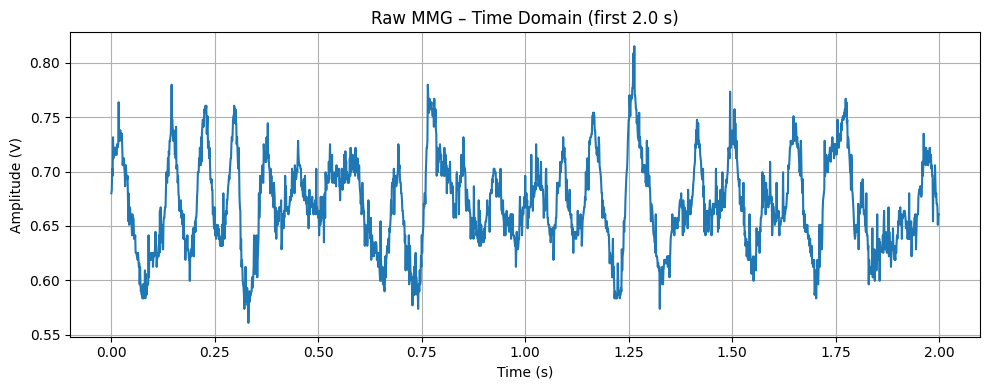

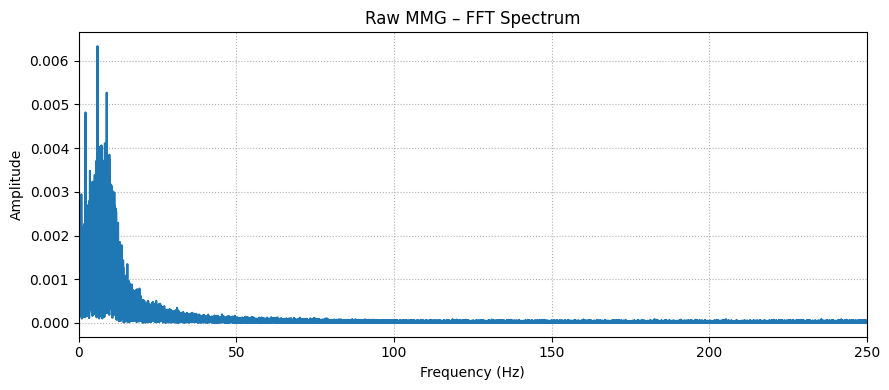

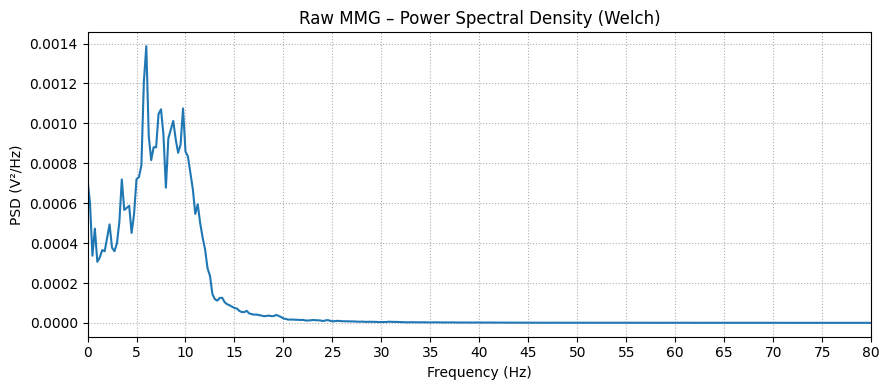

[FILTER] HP(3.0 Hz, ord 2) + LP(60.0 Hz, ord 4) (butter)


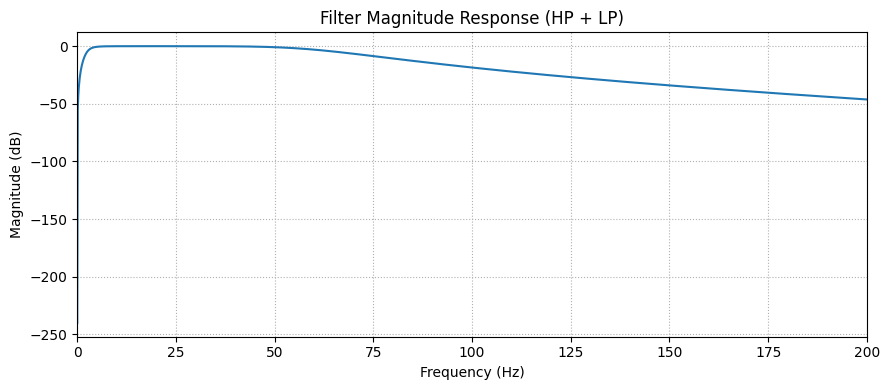

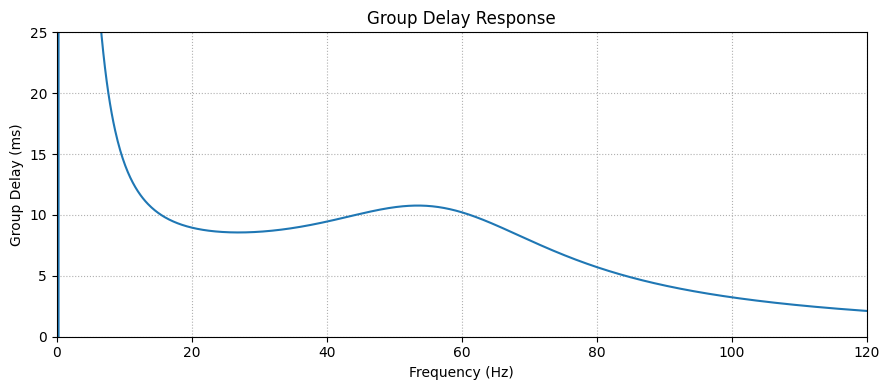

[FILTER] Applied HP+LP chain to 138517 samples.


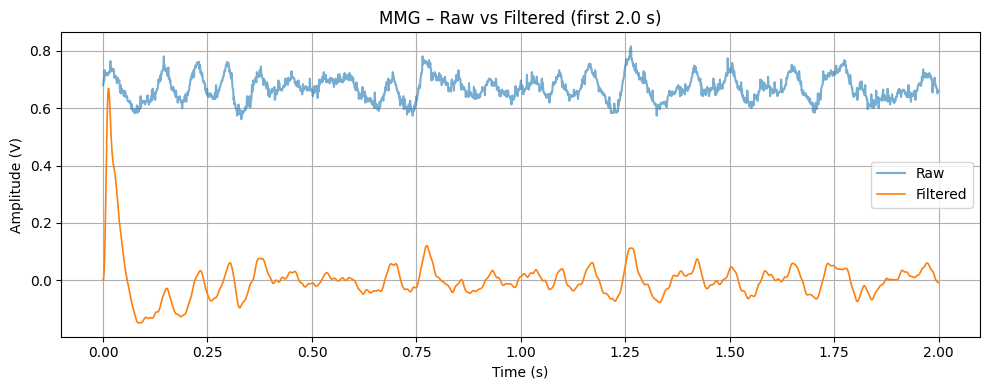

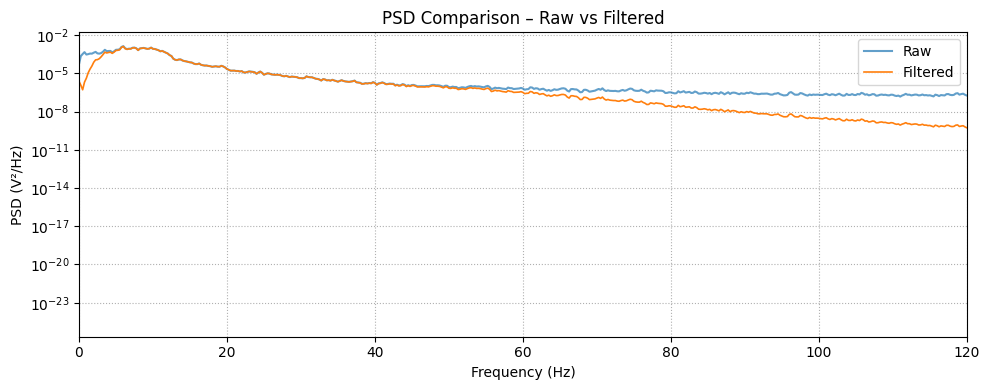

[RESULTS]
  Group delay (avg 5–60 Hz): 10.97 ms
  Empirical latency: 0.98 ms
  ΔSNR improvement: 3.49 dB


In [2]:
import numpy as np
from MMGFilterAnalyzer import MMGFilterAnalyzer

data = np.loadtxt("ADC_SUB1_STAGE2.csv", delimiter=",")
mmg = data[:, 1]   # column 2 is MMG
fs = 1024.0

analyzer = MMGFilterAnalyzer(mmg, fs)
analyzer.plot_raw_time_domain(duration=2)
analyzer.plot_raw_fft(max_hz=250)
analyzer.plot_raw_psd(max_hz=80)                # Welch PSD of raw
analyzer.design_filter(hp_cut=3, lp_cut=60)     # manual IIR design
analyzer.plot_filter_response()
analyzer.apply_filter()
analyzer.compare_filtered_vs_raw(duration=2, max_hz=120)
analyzer.compute_latency_and_snr(sig_band=(5,60))